## Cross Sell Production

In [17]:
#dependencies

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

### Trainset

In [4]:
df=pd.read_csv('D:/Data Sets/Janta Hack/Cross Sell Prediction/train.csv_VsW9EGx/train.csv') #reading file

In [5]:
df.head() #first five rows

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df=df.drop('id',axis=1)

In [7]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
df.shape

(381109, 11)

In [10]:
#finding missing values
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<AxesSubplot:>

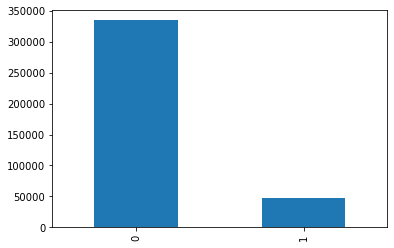

In [13]:
df['Response'].value_counts().plot(kind='bar') #this shows class imbalance in the data

In [14]:
#finding distinct values for the categorical variables
print(set(df.Vehicle_Age))

{'> 2 Years', '1-2 Year', '< 1 Year'}


#### Case1: Ignoring class imbalance

In [15]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [16]:
x

array([['Male', 44, 1, ..., 40454.0, 26.0, 217],
       ['Male', 76, 1, ..., 33536.0, 26.0, 183],
       ['Male', 47, 1, ..., 38294.0, 26.0, 27],
       ...,
       ['Male', 21, 1, ..., 35118.0, 160.0, 161],
       ['Female', 68, 1, ..., 44617.0, 124.0, 74],
       ['Male', 46, 1, ..., 41777.0, 26.0, 237]], dtype=object)

In [18]:
oe=OrdinalEncoder()
x=oe.fit_transform(x)
print(x)

[[1.0000e+00 2.4000e+01 1.0000e+00 ... 2.3593e+04 2.4000e+01 2.0700e+02]
 [1.0000e+00 5.6000e+01 1.0000e+00 ... 1.6675e+04 2.4000e+01 1.7300e+02]
 [1.0000e+00 2.7000e+01 1.0000e+00 ... 2.1433e+04 2.4000e+01 1.7000e+01]
 ...
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 1.8257e+04 1.5300e+02 1.5100e+02]
 [0.0000e+00 4.8000e+01 1.0000e+00 ... 2.7745e+04 1.1900e+02 6.4000e+01]
 [1.0000e+00 2.6000e+01 1.0000e+00 ... 2.4914e+04 2.4000e+01 2.2700e+02]]


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[ 0.92154476  0.33377727  0.04620794 ...  0.69175758 -1.58923383
   0.74879538]
 [ 0.92154476  2.39675074  0.04620794 ...  0.08872961 -1.58923383
   0.34244286]
 [ 0.92154476  0.52718104  0.04620794 ...  0.50347478 -1.58923383
  -1.52199808]
 ...
 [ 0.92154476 -1.14898491  0.04620794 ...  0.22662933  0.88561613
   0.07950888]
 [-1.08513449  1.88100737  0.04620794 ...  1.05367896  0.23333009
  -0.96027549]
 [ 0.92154476  0.46271311  0.04620794 ...  0.80690646 -1.58923383
   0.98782627]]


In [ ]:
#we will be taking two cases: ignoring class imbalance and the other one considering it. We will then be comparing the accuracies of both of them.

In [21]:
#we will take a small segment of dataset for validation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(304887, 10)
(76222, 10)
(304887,)
(76222,)


In [ ]:
#in this case will take 2 subcases by fitting and finding accruacies with different classification models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_lr=lr.predict(x_test)
print(accuracy_score(y_test,y_lr))
print(classification_report(y_test,y_lr))
#logistic regression gave a considerably good accuracy, however, we will still try other models
#here in the classification report we see it is not even predicting class 1. Bummer!

0.8769908950171866
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



C:\Users\91884\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=30)
rfc.fit(x_train,y_train)
y_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,y_rfc))
print(classification_report(y_test,y_rfc))
#we get a decent accuracy here too. We should not forget that we have ignored class imbalance this time.
#We are simply getting this accurcacy because of class imbalance.

0.8649208889821837
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66846
           1       0.36      0.13      0.19      9376

    accuracy                           0.86     76222
   macro avg       0.62      0.55      0.56     76222
weighted avg       0.82      0.86      0.84     76222



### Case2: Considering class imbalance

In [ ]:
#we know there are roughly 50k enteries for class 1. So to balance the dataset we take 50k enteries of class 0 too.


In [28]:
one=df[df.Response==1] #here we see 46k rows of class 1
one

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
10,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1
15,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1
...,...,...,...,...,...,...,...,...,...,...,...
381057,Male,40,1,46.0,0,1-2 Year,Yes,27508.0,26.0,189,1
381061,Female,41,1,28.0,0,1-2 Year,Yes,37377.0,124.0,99,1
381073,Female,46,1,28.0,0,1-2 Year,Yes,34741.0,124.0,167,1
381075,Female,61,1,28.0,0,1-2 Year,Yes,43875.0,26.0,139,1


In [29]:
zero=df[df.Response==0]
zero #over 330k rows for 0, which is almost 8 timess the other class

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [31]:
zero=zero.sample(one.shape[0])

In [36]:
data=pd.concat([one,zero],axis=0)
data.shape

(93420, 11)

In [37]:
from sklearn.utils import shuffle
data=shuffle(data)
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
106031,Male,67,1,31.0,0,> 2 Years,Yes,2630.0,154.0,101,0
4683,Female,44,1,28.0,0,1-2 Year,Yes,70905.0,26.0,64,1
372483,Female,26,1,7.0,1,< 1 Year,No,24951.0,152.0,203,0
95396,Female,38,1,32.0,0,1-2 Year,Yes,32996.0,124.0,86,1
110012,Male,50,1,19.0,0,1-2 Year,Yes,32873.0,124.0,88,1


In [44]:
data=data.reset_index(drop=True)
data=data.iloc[:,1:]
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,67,1,31.0,0,> 2 Years,Yes,2630.0,154.0,101,0
1,Female,44,1,28.0,0,1-2 Year,Yes,70905.0,26.0,64,1
2,Female,26,1,7.0,1,< 1 Year,No,24951.0,152.0,203,0
3,Female,38,1,32.0,0,1-2 Year,Yes,32996.0,124.0,86,1
4,Male,50,1,19.0,0,1-2 Year,Yes,32873.0,124.0,88,1
...,...,...,...,...,...,...,...,...,...,...,...
93415,Female,28,1,37.0,1,< 1 Year,No,30139.0,152.0,296,0
93416,Female,36,1,21.0,0,1-2 Year,Yes,2630.0,26.0,182,1
93417,Female,44,1,28.0,0,1-2 Year,Yes,42394.0,124.0,172,0
93418,Male,21,1,28.0,1,< 1 Year,No,20626.0,152.0,141,0


In [ ]:
#we would be using the same variables, doesn't matter in jupyter notebooks, outputs are saved.

In [48]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [49]:
oe=OrdinalEncoder()
sc=StandardScaler()
x=oe.fit_transform(x)
x=sc.fit_transform(x)
print(x)
print(x.shape)

[[ 0.867102    1.82678433  0.03804179 ... -1.31042563  0.89641703
  -0.63714095]
 [-1.15326686  0.22359947  0.03804179 ...  2.10141678 -1.38074931
  -1.07894015]
 [-1.15326686 -1.03106695  0.03804179 ... -0.82841058  0.8522002
   0.58079198]
 ...
 [-1.15326686  0.22359947  0.03804179 ...  0.93059192  0.38792357
   0.21063589]
 [ 0.867102   -1.3795854   0.03804179 ... -1.17292392  0.8522002
  -0.15952019]
 [ 0.867102    2.0358954   0.03804179 ...  1.79832745 -1.82291754
  -0.87595133]]
(93420, 10)


In [50]:
#we will take a small segment of dataset for validation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(74736, 10)
(18684, 10)
(74736,)
(18684,)


In [51]:
#logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_lr=lr.predict(x_test)
print(accuracy_score(y_test,y_lr))
print(classification_report(y_test,y_lr))

0.7813637336758724
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      9346
           1       0.70      0.98      0.82      9338

    accuracy                           0.78     18684
   macro avg       0.83      0.78      0.77     18684
weighted avg       0.83      0.78      0.77     18684



In [52]:
#random forest
rfc=RandomForestClassifier(n_estimators=30)
rfc.fit(x_train,y_train)
y_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,y_rfc))
print(classification_report(y_test,y_rfc))

0.7737636480411046
              precision    recall  f1-score   support

           0       0.83      0.69      0.75      9346
           1       0.73      0.86      0.79      9338

    accuracy                           0.77     18684
   macro avg       0.78      0.77      0.77     18684
weighted avg       0.78      0.77      0.77     18684

